In [127]:
Agenda = {
    1:"Importing what I want",
    2:"Loading our data",
    3:"Some analysis and visualization",
    4:"Functional evaluating loops and some notation",
    5:"Building model_0 the first version",
    6:"Building Model_1 to improve model_0",
    7:"Building model_2 to improve model_1",
    8:"Compareing models tesults and training time"
}

Agenda

{1: 'Importing what I want',
 2: 'Loading our data',
 3: 'Some analysis and visualization',
 4: 'Functional evaluating loops and some notation',
 5: 'Building model_0 the first version',
 6: 'Building Model_1 to improve model_0',
 7: 'Building model_2 to improve model_1',
 8: 'Compareing models tesults and training time'}

## 1. Importing what I want 

In [5]:
# import some basic 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pytorch
import torch
from torch import nn

# import torch dataset & transformation
import torchvision
from torchvision import datasets
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torchvision.transforms import ToTensor

## 2. Loading our dataset

Our data is called cifar10 dataset from Tensorflow This contain 60000 images with 32x32x3 with 10 classes, with 6000 images per class, and 50000 images for training data and 10000 images for testing data

> sourse of data = https://pytorch.org/vision/master/generated/torchvision.datasets.CIFAR10.html

In [6]:
# setup training data 
train_data = CIFAR10(
    root = "data", # where the data will downloaded 
    train = True, # it is training data not testing data
    download = True, # set the permision to download the data 
    transform = ToTensor(), # the whay to trandform our data
    target_transform = None # i will not transform the label of training data
)


# setup testing data
test_data = CIFAR10(
    root = "data", # the same root of trainig data
    train = False, # it is testing data not training 
    download  = True, # set the permition to complete downloading our data 
    transform = ToTensor(), # trandform our testing data
    target_transform = None
)

Files already downloaded and verified
Files already downloaded and verified


## 2.1 take a look to our data

In [7]:
len(train_data), len(test_data)

(50000, 10000)

In [8]:
# choose the first image from training data 
image, label = train_data[0]
print(f"Our image is:\n\n{image} \n\nAnd it's label is:\n{label}")

Our image is:

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1

In [9]:
# the data has 10 classes from 0 -> 9 let's take a look
class_names_idx = train_data.class_to_idx
class_names_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [10]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [11]:
# lets do something on label data
count = train_data.targets
# count is list so i will convert it into dataframe to de easy
df = pd.DataFrame(count)
df.head()

,0
0,6
1,9
2,9
3,4
4,1


In [12]:
# let's look to counts of each class 
# by looking to the output you will see it is a balcnc data
df.value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

In [100]:
print(f"The shape of image is: {image.shape}")
print(f"The label name of image is: {class_names[label]}")

The shape of image is: torch.Size([32, 32, 3])
The label name of image is: airplane


## 2.2 lst's visualize some samples from our data

The Image shapetorch.Size([3, 32, 32])


TypeError: Invalid shape (3, 32, 32) for image data

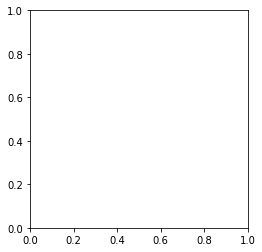

In [14]:
# let's visualize 
# this will be error becouse of matplotlib take (1,2,0) not (0,1,2)
# like that (32,32,3) not (3,32,32) , so i will solve this problem
random_num = torch.randint(0,               # low 
                           len(train_data), # max
                           size = [1]       # size
                          )      
image, label = train_data[random_num]
print(f"The Image shape{image.shape}")
plt.imshow(image)
plt.title(label)

The Image shapetorch.Size([32, 32, 3])


Text(0.5, 1.0, '6')

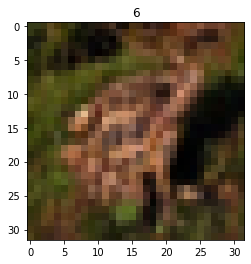

In [15]:
random_num = torch.randint(0,               # low 
                           len(train_data), # max
                           size = [1]       # size
                          )

image, label = train_data[random_num]
image = image.permute(1,2,0)
print(f"The Image shape{image.shape}")
plt.imshow(image)
plt.title(label)

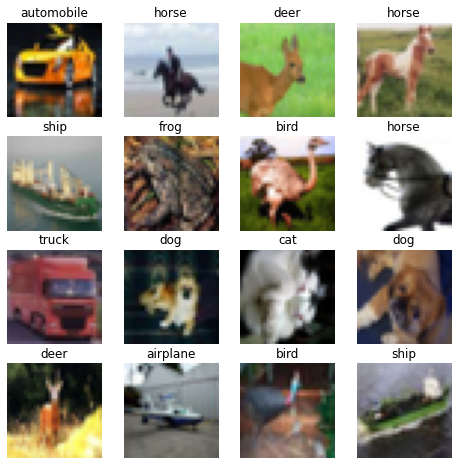

In [16]:
# plt multible image at the sae time 
# i will not setup random seed of torch.manel_seed(47)
import random

fig = plt.figure(figsize = (8,8))
# set the boundary and it will be 16 images
row, col = 4,4
for i in range(1,row*col+1):
    random_num = torch.randint(0, len(train_data) , size = [1]).item()
    img, label = train_data[random_num]
    img = img.permute(1,2,0)
    fig.add_subplot(row, col, i)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis(False)

In [17]:
# some information about data
train_data, test_data

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 3. Prepare DataLoader

our data in the form of PyTorch dataset

DataLoader turns out data into pytorch iterable, another way we want to turn our data into mini-batches
to be more simple and easy in computation hardware and many....

sourse for more informations = https://pytorch.org/docs/stable/data.html 

In [18]:
# import dataloader
from torch.utils.data import DataLoader

# setup batch size
BATCH = 32

# turn training data into iterables(batches)
train_loader = DataLoader(dataset = train_data,
                          batch_size = BATCH,
                          shuffle = True) # to destroy any ordaring 

# turn testing data into iterable too
test_loader = DataLoader(dataset = test_data,
                        batch_size = BATCH,
                        shuffle = True)

In [19]:
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7f090dcb2f10>,
 <torch.utils.data.dataloader.DataLoader at 0x7f090dcb2ed0>)

In [20]:
len(train_loader), len(test_loader)

(1563, 313)

In [21]:
# check what inside in train_loader
train_features_batch, train_label_batch = next(iter(train_loader))
train_features_batch.shape , train_label_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

image size: torch.Size([32, 32, 3])
label: 0 , and label size:torch.Size([])


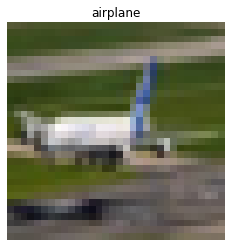

In [22]:
# show a sample from batch 
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
img = img.permute(1,2,0)
plt.imshow(img)
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"label: {label} , and label size:{label.shape}")

## 4. Functional evaluating loops and some notations

let's create a function for:

* evaluating - `eval_model()`

In [38]:
from tqdm.auto import tqdm

## evaluating model loop
torch.manual_seed(47)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
    
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for x,y in tqdm(data_loader):
            
            # make prediction
            y_pred = model(x)
            
            # accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y,
                              y_pred = y_pred.argmax(dim = 1))
            
        # scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return{"model_name": model.__class__.__name__, # it's work only when model crreated with class method
          "model_loss": loss.item(),
          "model_acc": acc}

## 4.1 Create time function

In [ ]:
from timeit import default_timer as timer
def print_time(start: float,
              end: float,
              device: None):
    total_time = end - start
    print(f"Trainig time:{total_time:.3f} seconds")
    
    return total_time

## 5. Building model_0 the first version

In [24]:
# some notation
# this is a flatten layer
flatten_model = nn.Flatten()
# take a sample from the container
x = train_features_batch[0]
# apply the flatten layer on data 
output = flatten_model(x)

# print what happen
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([3, 32, 32])
Shape after flattening: torch.Size([3, 1024])


In [25]:
## the model_0
class CIFAR10_model_v0(nn.Module):
    def __init__(self,
                input_shape: int,
                output_shape: int,
                hidden_units: int): # the constructor
        super().__init__()
        # add the sequential layers 
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                     out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,
                     out_features = output_shape),
            nn.ReLU()
        )
    
    # forward method to compute training data
    def forward(self, x):
        return self.layer_stack(x)

In [26]:
# create the object from the class
model_0 = CIFAR10_model_v0(input_shape = 32*32*3,
                          hidden_units = 16,
                          output_shape = len(class_names))

model_0

CIFAR10_model_v0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [27]:
model_0.layer_stack

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=16, bias=True)
  (2): ReLU()
  (3): Linear(in_features=16, out_features=10, bias=True)
  (4): ReLU()
)

In [28]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0161, -0.0162, -0.0012,  ...,  0.0136, -0.0175, -0.0012],
                      [ 0.0080, -0.0073,  0.0068,  ..., -0.0161, -0.0011,  0.0008],
                      [ 0.0138,  0.0047,  0.0144,  ...,  0.0100, -0.0176,  0.0053],
                      ...,
                      [-0.0056,  0.0123,  0.0126,  ..., -0.0062, -0.0017,  0.0085],
                      [-0.0047,  0.0075, -0.0029,  ..., -0.0137,  0.0054, -0.0127],
                      [-0.0104,  0.0152, -0.0161,  ..., -0.0035, -0.0079, -0.0013]])),
             ('layer_stack.1.bias',
              tensor([-0.0161,  0.0154, -0.0087, -0.0153, -0.0004, -0.0056, -0.0105, -0.0015,
                       0.0023, -0.0065, -0.0053, -0.0031, -0.0100, -0.0029,  0.0117, -0.0044])),
             ('layer_stack.3.weight',
              tensor([[-0.0732,  0.2114, -0.1800,  0.1447,  0.0161,  0.1529, -0.1482, -0.1259,
                       -0.1785, -0.0300, -0.0317, -0.1590,  0.1423, 

## 5.1 Setup loss & optimization and evaluation 

In [29]:
# loss function 
loss_fn = nn.CrossEntropyLoss()

# optimization 
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.01)

In [30]:
## accuracy function 

# let's import the accuracy function from a repo in github

# import some basic
import requests
from pathlib import Path 

# the name of the file is helper_functions.py
if Path("helper_functions.py").is_file(): # if the condition is true
    # print if true
    print("helper function is already exists.")
# if the condition is false 
else:
    # print it 
    print("Downloading helper function ")
    # get the content in this link 
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    # open and set the permission 
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper function is already exists.


In [31]:
# import the accuracy 
from helper_functions import accuracy_fn

## 5.2 Create a training loop and train the model

In [35]:
# import tqbm
from tqdm.auto import tqdm

torch.manual_seed(47)
train_time_start_model_0 = timer()

model_0_epochs = 10

for epoch in tqdm(range(model_0_epochs)):
    print(f"Epoch :{epoch}\n---------")
    
    ## training
    # initail the value of loss for training data 
    train_loss = 0
    for batch, (x,y) in enumerate(train_loader):
        model_0.train()
        # 1. forward pass 
        y_pred = model_0(x)
        
        # 2. calcualte the loss 
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        # 3. optimizer zero grad
        optimizer.zero_grad()
        
        # 4. loss backward
        loss.backward()
        
        # 5. optimizer step the model parameters per batch
        optimizer.step()
        
        # print what happen
        if batch%400 == 0:
            print(f"Looking at {batch*len(x)}/{len(train_loader.dataset)} samples.")
            

    train_loss /= len(train_loader)

     ## testing 
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        # here is a good thing 
        # here we separate the features(images) and its labels 
        for x_test, y_test in test_loader:
            # 1. forward pass
            test_pred = model_0(x_test)
        
            # 2. calculate the loss
            test_loss += loss_fn(test_pred, y_test)
        
            # 3. calculate the accuracy
            test_acc += accuracy_fn(y_true = y_test,
                                  y_pred = test_pred.argmax(dim = 1)) 
        # calculate the test loss 
        test_loss /= len(test_loader)
    
        # calculate the acc in test data
        test_acc /= len(test_loader)

    # print what happen
    print(f"\nTrain loss: {train_loss:.3f} | Test loss:{test_loss:.2f}, Test acc:{test_acc:.2f}")

# time end 
train_time_end_model_0 = timer()
# calculate training time
total_train_time_model_0 = print_time(start = train_time_start_model_0,
                                     end = train_time_end_model_0,
                                     device = None)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch :0
---------
Looking at 0/50000 samples.
Looking at 12800/50000 samples.
Looking at 25600/50000 samples.
Looking at 38400/50000 samples.

Train loss: 1.747 | Test loss:1.75, Test acc:39.61
Epoch :1
---------
Looking at 0/50000 samples.

Train loss: 1.705 | Test loss:1.75, Test acc:39.46
Epoch :8
---------
Looking at 0/50000 samples.
Looking at 12800/50000 samples.
Looking at 25600/50000 samples.
Looking at 38400/50000 samples.

Train loss: 1.700 | Test loss:1.76, Test acc:38.48
Epoch :9
---------
Looking at 0/50000 samples.
Looking at 12800/50000 samples.
Looking at 25600/50000 samples.
Looking at 38400/50000 samples.

Train loss: 1.603 | Test loss:1.65, Test acc:42.24
Trainig time:91.875 seconds


## 5.3 evaluate the model_0

In [39]:
model_0_results = eval_model(model = model_0,
                            data_loader = test_loader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'CIFAR10_model_v0',
 'model_loss': 1.6483756303787231,
 'model_acc': 42.24241214057508}

**The accuracy of model_0 is not good so I will built anothe model**

## 6. Building Model_1 to improve model_0

In [105]:
class model_v1(nn.Module):
    def __init__(self, 
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        
        # let's start to stack the layers
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # in_features responsible for mat2
            nn.Linear(in_features = hidden_units*49, 
                     out_features = output_shape)
        )
    def forward(self, x:torch)-> torch:
        x = self.conv_block_1(x)
        #print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x) 
        #print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        #print(f"Output shape of classifier: {x.shape}")
        return x

In [106]:
list(train_data[0][0].shape)

[3, 32, 32]

In [107]:
torch.manual_seed(47)
model_1 = model_v1(input_shape =3,
                  hidden_units = 49,
                  output_shape = len(class_names))
model_1

model_v1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 49, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(49, 49, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(49, 49, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(49, 49, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2401, out_features=10, bias=True)
  )
)

In [108]:
model_1.parameters

<bound method Module.parameters of model_v1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 49, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(49, 49, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(49, 49, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(49, 49, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2401, out_features=10, bias=True)
  )
)>

In [109]:
model_1.state_dict

<bound method Module.state_dict of model_v1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 49, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(49, 49, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(49, 49, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(49, 49, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2401, out_features=10, bias=True)
  )
)>

## 6.1 Setup loss & optimizer and accuracy functions

In [110]:
# loss function 
loss_fn = nn.CrossEntropyLoss()

# optimization 
optimizer = torch.optim.SGD(params = model_1.parameters(),
                           lr = 0.01)

## 6.2 Stepping through `nn.Conv2d()`

In [111]:
# create a random image or we can say a batch (10) of images
images = torch.randn(size = (10, 3, 32, 32))
# now I have 10 images with 32x32 and 3 channels

# take a test image
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([10, 3, 32, 32])
single image shape: torch.Size([3, 32, 32])
Test image:
 tensor([[[-0.0999,  0.5885,  1.3959,  ...,  1.3996,  1.3069,  0.0825],
         [-0.7386,  1.9924,  0.9298,  ..., -0.2439, -0.0885,  1.4246],
         [-1.0166,  1.4752, -2.0980,  ..., -0.2929,  0.0905,  1.4398],
         ...,
         [ 0.3905, -0.7339, -1.2192,  ...,  0.1437,  0.6027, -0.2049],
         [-0.1993,  0.3440,  1.2976,  ...,  1.1852,  0.0784,  0.5577],
         [-0.2944, -1.4314,  1.7925,  ...,  0.6230,  0.3497,  0.2912]],

        [[-0.1920, -0.0144, -2.0570,  ..., -1.9002,  0.6657, -0.0317],
         [-0.2925,  0.0297, -0.4037,  ..., -0.5730,  0.0398, -0.8159],
         [-0.1829,  0.2741,  0.1000,  ...,  1.4020,  0.8864, -1.0123],
         ...,
         [ 1.0585, -0.9936, -1.4953,  ...,  0.2359,  0.0836, -0.4371],
         [-0.5683, -0.2296,  0.1585,  ...,  0.6395, -1.6115, -0.2450],
         [-1.2722, -0.1870, -0.5447,  ...,  1.6969, -1.0683,  0.5426]],

        [[ 2

In [112]:
torch.manual_seed(47)

# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels = 3,
                      out_channels = 10,
                       kernel_size = (3,3),
                      padding = 0)

# pass the data through the conv2d layer 
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 30, 30])

## 6.3 Stepping through `nn.MaxPool2d()`

In [113]:
test_image.shape

torch.Size([3, 32, 32])

In [114]:
# at first lets remmember the original shape of the test image
print(f"The original shape of test image is :{test_image.shape}")


# now lets remmember the shape of the conv layer 
print(f"The shape after going through conv layer is :{conv_output.shape}")


# define the maxpoll2d layer
max_pool = nn.MaxPool2d(kernel_size = 2)

# pass the data through this layer 
test_image_max_pool = max_pool(conv_output)

# print the results 
print(f"The shape after going through max_pool layer is :{test_image_max_pool.shape}")

The original shape of test image is :torch.Size([3, 32, 32])
The shape after going through conv layer is :torch.Size([10, 30, 30])
The shape after going through max_pool layer is :torch.Size([10, 15, 15])


In [115]:
## setup the optimizer for model_1 

# optimization 
optimizer = torch.optim.SGD(params = model_1.parameters(),
                           lr = 0.01)

## 6.4 Training model_1 and evaluate

In [116]:
# import tqbm
from tqdm.auto import tqdm

torch.manual_seed(47)
train_time_start_model_1 = timer()

model_1_epochs = 2

for epoch in tqdm(range(model_1_epochs)):
    print(f"Epoch :{epoch}\n---------")
    
    ## training
    # initail the value of loss for training data 
    train_loss = 0
    for batch, (x,y) in enumerate(train_loader):
        model_1.train()
        # 1. forward pass 
        y_pred = model_1(x)
        
        # 2. calcualte the loss 
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        # 3. optimizer zero grad
        optimizer.zero_grad()
        
        # 4. loss backward
        loss.backward()
        
        # 5. optimizer step the model parameters per batch
        optimizer.step()
        
        # print what happen
        if batch%400 == 0:
            print(f"Looking at {batch*len(x)}/{len(train_loader.dataset)} samples.")
            

    train_loss /= len(train_loader)

     ## testing 
    test_loss, test_acc = 0, 0
    model_1.eval()
    with torch.inference_mode():
        # here is a good thing 
        # here we separate the features(images) and its labels 
        for x_test, y_test in test_loader:
            # 1. forward pass
            test_pred = model_1(x_test)
        
            # 2. calculate the loss
            test_loss += loss_fn(test_pred, y_test)
        
            # 3. calculate the accuracy
            test_acc += accuracy_fn(y_true = y_test,
                                  y_pred = test_pred.argmax(dim = 1)) 
        # calculate the test loss 
        test_loss /= len(test_loader)
    
        # calculate the acc in test data
        test_acc /= len(test_loader)

    # print what happen
    print(f"\nTrain loss: {train_loss:.3f} | Test loss:{test_loss:.2f}, Test acc:{test_acc:.2f}")

# time end 
train_time_end_model_1 = timer()
# calculate training time
total_train_time_model_1 = print_time(start = train_time_start_model_1,
                                     end = train_time_end_model_1,
                                     device = None)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch :0
---------
Looking at 0/50000 samples.
Looking at 12800/50000 samples.
Looking at 25600/50000 samples.
Looking at 38400/50000 samples.

Train loss: 2.124 | Test loss:1.97, Test acc:28.73
Epoch :1
---------
Looking at 0/50000 samples.
Looking at 12800/50000 samples.
Looking at 25600/50000 samples.
Looking at 38400/50000 samples.

Train loss: 1.741 | Test loss:1.56, Test acc:44.41
Trainig time:446.200 seconds


In [117]:
model_1_results = eval_model(model = model_1,
                            data_loader = test_loader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'model_v1',
 'model_loss': 1.5595723390579224,
 'model_acc': 44.34904153354633}

**The accuracy of model_1 is not good s I will improve the model_1**

## 7. Building model_2 to improve model_1

In [118]:
class model_v2(nn.Module):
    def __init__(self,
                 input_shape: int,
                output_shape: int):
        super().__init__()
        
        # let's start to stack the layers
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                     out_channels = 64,
                     kernel_size = 3,
                     padding = 1),
            nn.Conv2d(in_channels = 64,
                     out_channels = 64,
                     kernel_size = 3,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64,
                     out_channels = 32,
                     kernel_size = 3,
                     padding = 1),
            nn.Conv2d(in_channels = 32,
                     out_channels = 32,
                     kernel_size = 3,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = 32,
                     out_channels = 64,
                     kernel_size = 3,
                     padding = 1),
            nn.Conv2d(in_channels = 64,
                     out_channels = 32,
                     kernel_size = 3,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 32,
                     out_channels = 16,
                     kernel_size = 3),
            nn.Conv2d(in_channels = 16,
                     out_channels = 16,
                     kernel_size = 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # in_features responsible for mat2
            nn.Linear(in_features = 16*36, 
                     out_features = 32),
            
            nn.Linear(in_features = 32, 
                     out_features = 16*6*6),
            
            nn.Dropout(p=0.2),
            
            nn.Linear(in_features = 16*6*6, 
                     out_features = 10)
        )
        
    def forward(self, x:torch)-> torch:
        x = self.conv_block_1(x)
        #print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x) 
        #print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        #print(f"Output shape of classifier: {x.shape}")
        return x

In [119]:
model_2 = model_v2(input_shape = 3,
                   output_shape = len(class_names))
model_2

model_v2(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=576, out_features=32, bia

In [90]:
# model_2.state_dict()

In [121]:
## setup the optimizer for model_1 

# optimization 
optimizer = torch.optim.SGD(params = model_2.parameters(),
                           lr = 0.01)

## 7.1 Training model_2 and evaluate

In [122]:
# import tqbm
from tqdm.auto import tqdm

torch.manual_seed(47)
train_time_start_model_2 = timer()

model_2_epochs = 2

for epoch in tqdm(range(model_2_epochs)):
    print(f"Epoch :{epoch}\n---------")
    
    ## training
    # initail the value of loss for training data 
    train_loss = 0
    for batch, (x,y) in enumerate(train_loader):
        model_2.train()
        # 1. forward pass 
        y_pred = model_1(x)
        
        # 2. calcualte the loss 
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        # 3. optimizer zero grad
        optimizer.zero_grad()
        
        # 4. loss backward
        loss.backward()
        
        # 5. optimizer step the model parameters per batch
        optimizer.step()
        
        # print what happen
        if batch%400 == 0:
            print(f"Looking at {batch*len(x)}/{len(train_loader.dataset)} samples.")
            

    train_loss /= len(train_loader)

     ## testing 
    test_loss, test_acc = 0, 0
    model_1.eval()
    with torch.inference_mode():
        # here is a good thing 
        # here we separate the features(images) and its labels 
        for x_test, y_test in test_loader:
            # 1. forward pass
            test_pred = model_2(x_test)
        
            # 2. calculate the loss
            test_loss += loss_fn(test_pred, y_test)
        
            # 3. calculate the accuracy
            test_acc += accuracy_fn(y_true = y_test,
                                  y_pred = test_pred.argmax(dim = 1)) 
        # calculate the test loss 
        test_loss /= len(test_loader)
    
        # calculate the acc in test data
        test_acc /= len(test_loader)

    # print what happen
    print(f"\nTrain loss: {train_loss:.3f} | Test loss:{test_loss:.2f}, Test acc:{test_acc:.2f}")

# time end 
train_time_end_model_2 = timer()
# calculate training time
total_train_time_model_2 = print_time(start = train_time_start_model_2,
                                     end = train_time_end_model_2,
                                     device = None)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch :0
---------
Looking at 0/50000 samples.
Looking at 12800/50000 samples.
Looking at 25600/50000 samples.
Looking at 38400/50000 samples.

Train loss: 1.567 | Test loss:2.31, Test acc:10.23
Epoch :1
---------
Looking at 0/50000 samples.
Looking at 12800/50000 samples.
Looking at 25600/50000 samples.
Looking at 38400/50000 samples.

Train loss: 1.567 | Test loss:2.31, Test acc:10.16
Trainig time:453.237 seconds


## evaluating model_3

In [123]:
model_2_results = eval_model(model = model_2,
                            data_loader = test_loader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'model_v2',
 'model_loss': 2.3050670623779297,
 'model_acc': 10.003993610223642}

In [94]:
# the archetecture of model_3 if you eant to improve the model_2
# anothe thing you can use transfere learning 

"""
class model_v3(nn.Module):
    def __init__(self, 
                output_shape: int):
        super().__init__()
        
        # let's start to stack the layers
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     padding = 1),
            nn.Conv2d(in_channels = input_shape,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     padding = 1),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     padding = 1),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # in_features responsible for mat2
            nn.Linear(in_features = hidden_units, 
                     out_features = hidden_units),
            
            nn.Linear(in_features = hidden_units, 
                     out_features = hidden_units),
            
            nn.Dropout(p=0.2),
            
            nn.Linear(in_features = hidden_units*49, 
                     out_features = output_shape)
        )
    def forward(self, x:torch)-> torch:
        x = self.conv_block_1(x)
        #print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x) 
        #print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        #print(f"Output shape of classifier: {x.shape}")
        return x
"""

## 8. Compareing models tesults and training time 

In [124]:
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,CIFAR10_model_v0,1.648376,42.242412
1,model_v1,1.559572,44.349042
2,model_v2,2.305067,10.003994


In [125]:
compare_results["training_time"] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,CIFAR10_model_v0,1.648376,42.242412,91.874684
1,model_v1,1.559572,44.349042,446.200356
2,model_v2,2.305067,10.003994,453.236897


In [126]:
compare_results["epochs_number"] = [model_0_epochs,
                                   model_1_epochs,
                                   model_2_epochs]
compare_results

,model_name,model_loss,model_acc,training_time,epochs_number
0,CIFAR10_model_v0,1.648376,42.242412,91.874684,10
1,model_v1,1.559572,44.349042,446.200356,2
2,model_v2,2.305067,10.003994,453.236897,2


**It's shocking my friend, the model has become much worse.
A neural network is not optimized by stacking layers on top of each other, keep this in mind.
But I learned some good things about extending neural networks and fixing many bugs related to internal dimensions, and that's the point.
And be that by looking at the previous numbers, we notice very large numbers, although the number of epochs is very few, but the size of the network is large as we progress unfortunately, and certainly by looking at the code we can deduce everything.**

**thanks torch doc**

**thanks Danial Bourke**